In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x7fa0451d4f98>)

In [4]:
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


### Load the Data into Pandas

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('Fremont.csv')

In [7]:
data.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


lets make the dates as the index row and parse the date as date in pandas.

In [8]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

In [9]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [10]:
%matplotlib inline

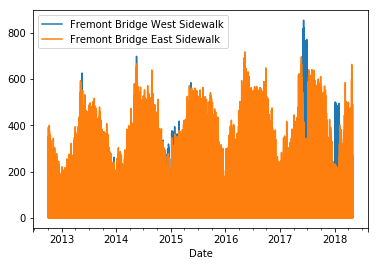

In [11]:
data.plot()

We can see  that this is really dense, all data point over the course of 5 years. to see it better we can resample say over the weekly data.

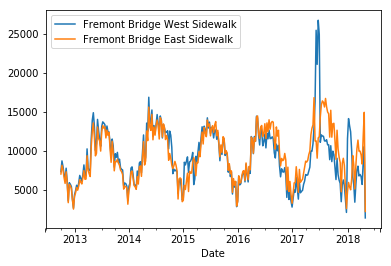

In [12]:
data.resample('W').sum().plot();

Lets change the default matplotlib style.

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.style.use('seaborn')

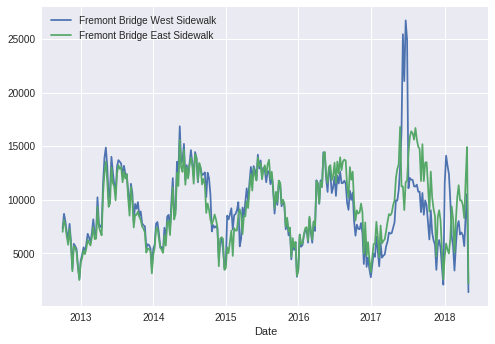

In [15]:
data.resample('W').sum().plot();

Lets reduce the length of the data legends

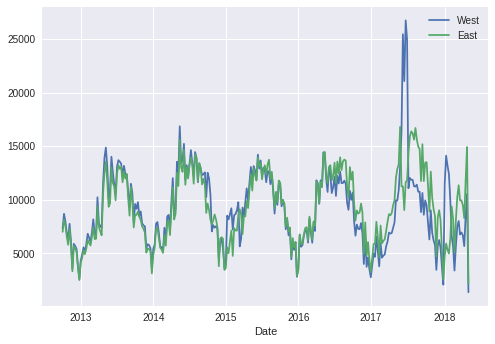

In [16]:
data.columns = ['West', 'East']
data.resample('W').sum().plot();

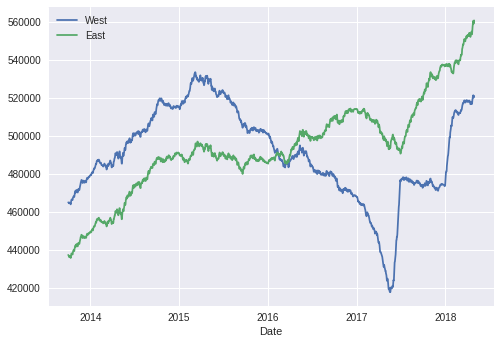

In [17]:
data.resample('D').sum().rolling(365).sum().plot();

(0, 567738.75)

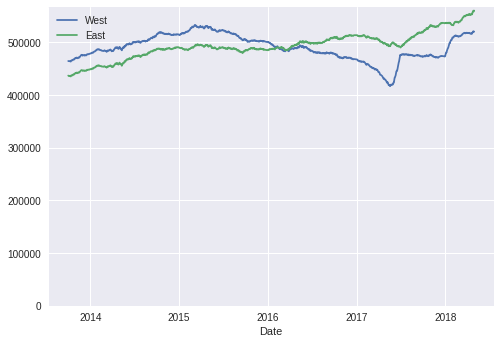

In [18]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

(0, 1114778.25)

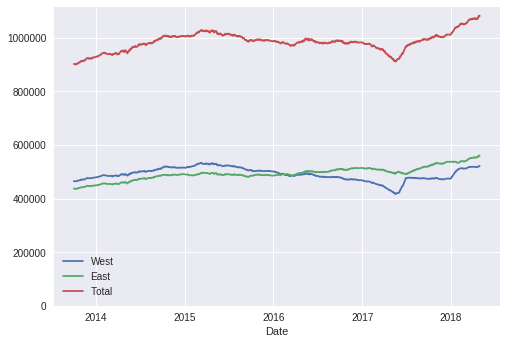

In [19]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

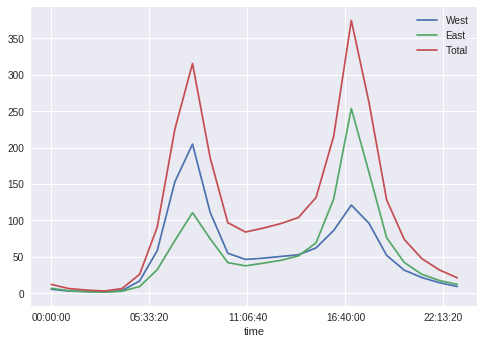

In [20]:
data.groupby(data.index.time).mean().plot()

In [21]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, -5:]

,2018-04-26,2018-04-27,2018-04-28,2018-04-29,2018-04-30
00:00:00,12.0,18.0,16.0,20.0,2.0
01:00:00,5.0,10.0,6.0,8.0,2.0
02:00:00,1.0,0.0,3.0,7.0,4.0
03:00:00,2.0,4.0,2.0,1.0,2.0
04:00:00,8.0,9.0,2.0,3.0,7.0


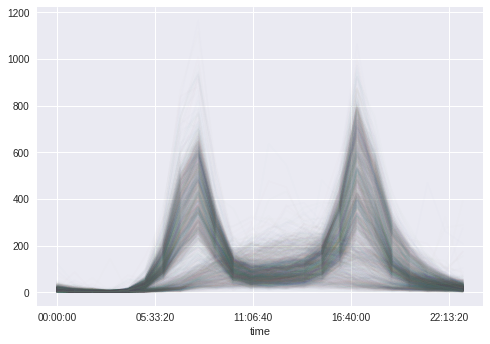

In [22]:
pivoted.plot(legend=False, alpha=0.01)